In [1]:
import pandas as pd

# Load feature-engineered data from Module 3
X = pd.read_csv('data/features_X.csv', index_col=0, parse_dates=True)
y = pd.read_csv('data/target_y.csv', index_col=0, parse_dates=True)

X.shape, y.shape


((3702, 21), (3702, 1))

In [2]:
train_size = int(len(X) * 0.7)
val_size = int(len(X) * 0.15)

train_size, val_size


(2591, 555)

In [3]:
X_train = X.iloc[:train_size]
X_val   = X.iloc[train_size:train_size + val_size]
X_test  = X.iloc[train_size + val_size:]


In [4]:
y_train = y.iloc[:train_size]
y_val   = y.iloc[train_size:train_size + val_size]
y_test  = y.iloc[train_size + val_size:]


In [5]:
X_train.shape, X_val.shape, X_test.shape


((2591, 21), (555, 21), (556, 21))

In [6]:
from sklearn.linear_model import LinearRegression


In [7]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
y_train_pred = model.predict(X_train)


In [9]:
y_val_pred = model.predict(X_val)


In [10]:
y_test_pred = model.predict(X_test)


In [11]:
y_test_pred[:5]


array([[0.01663405],
       [0.01251829],
       [0.01649705],
       [0.02288011],
       [0.00732998]])

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


In [13]:
train_mae = mean_absolute_error(y_train, y_train_pred)
val_mae   = mean_absolute_error(y_val, y_val_pred)
test_mae  = mean_absolute_error(y_test, y_test_pred)

train_mae, val_mae, test_mae


(0.012288029450588742, 0.009249231897419639, 0.013068187786042806)

In [14]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
val_rmse   = np.sqrt(mean_squared_error(y_val, y_val_pred))
test_rmse  = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_rmse, val_rmse, test_rmse


(np.float64(0.02384011030948557),
 np.float64(0.017475736119408596),
 np.float64(0.02549379676797534))

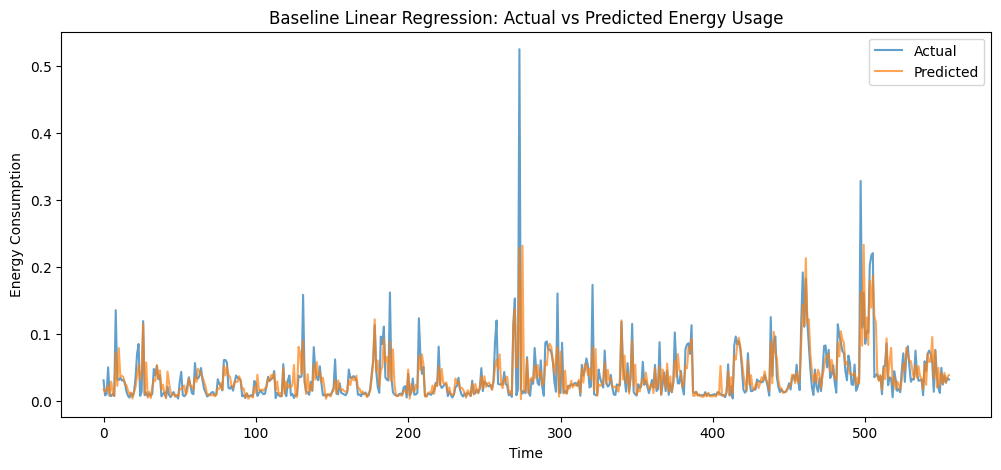

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(y_test.values, label='Actual', alpha=0.7)
plt.plot(y_test_pred, label='Predicted', alpha=0.7)
plt.title('Baseline Linear Regression: Actual vs Predicted Energy Usage')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()


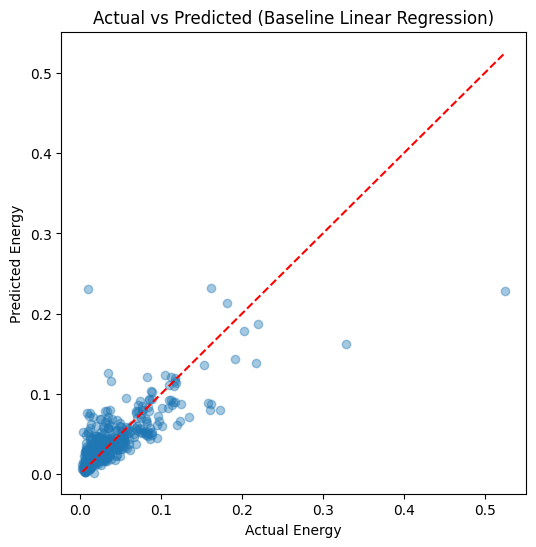

In [16]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel('Actual Energy')
plt.ylabel('Predicted Energy')
plt.title('Actual vs Predicted (Baseline Linear Regression)')
plt.show()
